# LG
# Day1 Class

# Class1 - 1 : FFT analysis and display

Generate a sinusoid - from scratch using numpy library only

In [0]:
import numpy as np

fs = 44100 # sampling rate
amp = 0.5 # amplitude
freq = 440 # frequency in Hz
T = 1/fs # sampling period
dur = 2 # duration in seconds
phi = np.pi/2 # initual phase in radian

# time-domain signal Sinosoid 만들기
x = amp*np.sin(2*np.pi*freq*np.arange(0, dur, T)+phi)

playing audio using IPython.display module

In [4]:
import IPython.display as ipd
ipd.Audio(x, rate=fs, autoplay=False)

plot waveform (0.1 second)

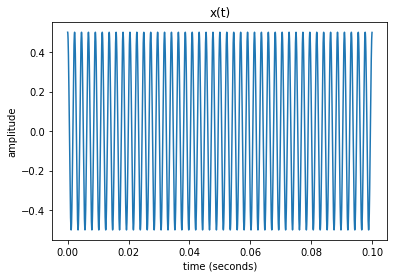

In [5]:
import matplotlib.pyplot as plt

dur = 0.1
xs = x[0:int(fs*dur)]
ti = np.linspace(0,dur,int(fs*dur))
plt.plot(ti,xs)
plt.title('x(t)')
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()

Fourier transform


In [0]:
nfft = 2048 # fft size
x_nfft = x[0:nfft] # snippet of x rectangular Window
X = np.fft.fft(x_nfft) # complex numbers

show magitude response of Fourier transform

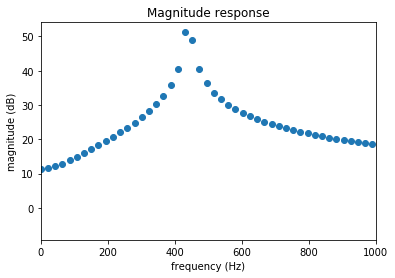

In [7]:
Xdb = 20*np.log10(np.absolute(X) + np.finfo(float).eps) # magnitude in dB scale
Xdb = list(Xdb)
fi = np.arange(0,fs,fs/nfft) # freq. resolution = fs/nfft
plt.title('Magnitude response')
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')
plt.xlim(0,fs/2) # show only up to Nyquist limit (fs/2)
plt.plot(fi,Xdb,'o')
plt.xlim(0,1000)
plt.show()

show phase response of Fourier transform

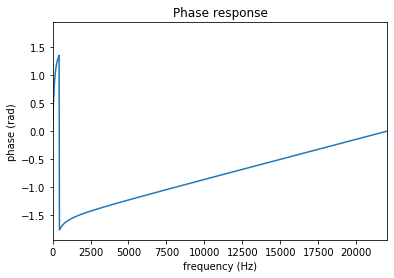

In [8]:
phs = np.angle(X) # phase in radians
plt.title('Phase response')
plt.xlabel('frequency (Hz)')
plt.ylabel('phase (rad)')
plt.xlim(0,fs/2)
plt.plot(fi,phs)
plt.show()

# Class1 - 2 : Frequency resolution & zero padding

generate sinusoid and time-domain signal

In [0]:
fs = 44100 # sampling rate
amp = 1 # amplitude
freq = 440 # frequency in Hz
T = 1/fs # sampling period
dur = 2 # duration in seconds
phi = 0 # initual phase in radian

# time-domain signal
x = amp*np.sin(2*np.pi*freq*np.arange(0, dur, T)+phi)

Fourier transform

In [0]:
nfft1 = 1024 # fft size
x_nfft1 = x[0:nfft1] # snippet of x
X1 = np.fft.fft(x_nfft1) # complex numbers
Xdb1 = 20*np.log10(np.absolute(X1) + np.finfo(float).eps) # magnitude in dB scale
Xdb1 = list(Xdb1)

zero-padding

In [0]:
nfft2 = 8192
x_nfft2 = np.append(x_nfft1, [0] * (nfft2 - len(x_nfft1)))
X2 = np.fft.fft(x_nfft2)
Xdb2 = 20*np.log10(np.absolute(X2) + np.finfo(float).eps)
Xdb2 = list(Xdb2)

plot time-domain wavform

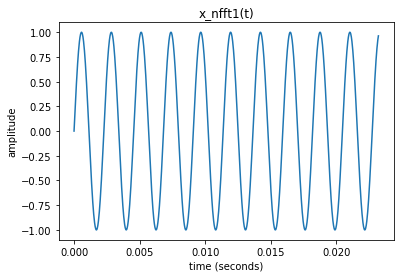

In [12]:
ti = np.arange(0,dur,T)
plt.plot(ti[0:nfft1],x_nfft1)
plt.title('x_nfft1(t)')
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()

plot zero-padded signal

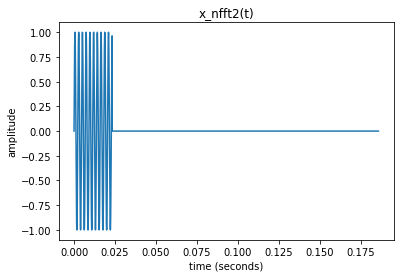

In [13]:
plt.plot(ti[0:nfft2],x_nfft2)
plt.title('x_nfft2(t)')
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()

plot fft magnitude without zero-padding

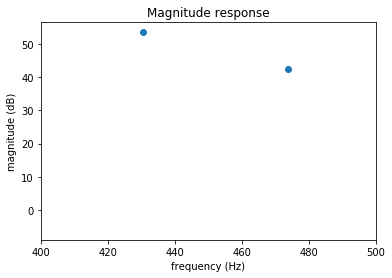

In [14]:
fi = np.arange(0,fs,fs/nfft1) # freq. resolution = fs/nfft1 = 43.07 Hz
plt.title('Magnitude response')
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')
plt.xlim(400,500)
plt.plot(fi,Xdb1,'o')
plt.show()

plot fft magnitude with zero-padding

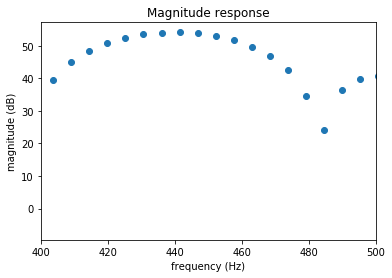

In [15]:
fi = np.arange(0,fs,fs/nfft2) # freq. resolution = fs/nfft2 = 5.38 Hz
plt.title('Magnitude response')
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')
plt.xlim(400,500)
plt.plot(fi,Xdb2,'o')
plt.show()

# Class1 - 3 : Spectral leaking & windowing

generate sinusoid and time-domain signal

In [0]:
fs = 8000 # sampling rate
amp = 1 # amplitude
freq = 440 # frequency in Hz
T = 1/fs # sampling period
dur = 2 # duration in seconds
phi = 0 # initual phase in radian

# time-domain signal
x = amp*np.sin(2*np.pi*freq*np.arange(0, dur, T)+phi)

Fourier transform

In [0]:
nfft = 1024 # fft size
x_nfft = x[0:nfft] # snippet of x
X = np.fft.fft(x_nfft) # complex numbers
Xdb = 20*np.log10(np.absolute(X) + np.finfo(float).eps) # magnitude in dB scale
Xdb = list(Xdb)

windowing

In [0]:
win = np.hanning(nfft) # Hann window
xw = np.multiply(x_nfft, win)
Xw = np.fft.fft(xw)
Xwdb = 20*np.log10(np.absolute(Xw) + np.finfo(float).eps) # magnitude in dB scale
Xwdb = list(Xwdb)

display time-domain wavform

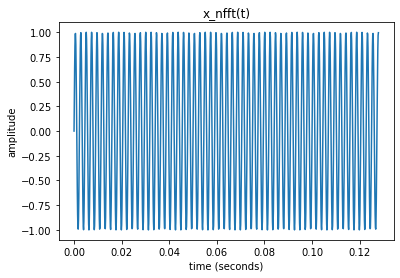

In [19]:
ti = np.arange(0,dur,T)
plt.plot(ti[0:nfft],x_nfft)
plt.title('x_nfft(t)')
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()

display windowed time-domain signal

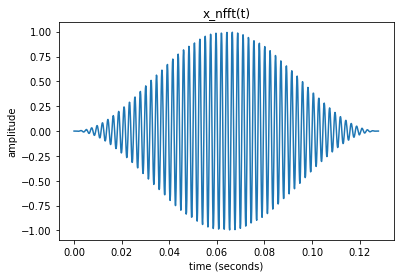

In [20]:
ti = np.arange(0,dur,T)
plt.plot(ti[0:nfft],xw)
plt.title('x_nfft(t)')
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()

plot fft of original signal

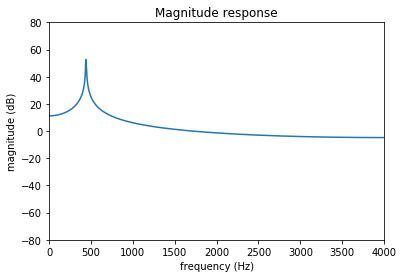

In [21]:
fi = np.arange(0,fs,fs/nfft) # freq. resolution = fs/nfft
plt.title('Magnitude response')
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')
plt.xlim(0,fs/2) # show only up to Nyquist limit (fs/2)
plt.ylim(-80,80)
plt.plot(fi,Xdb)
plt.show()

plot fft of windowed signal

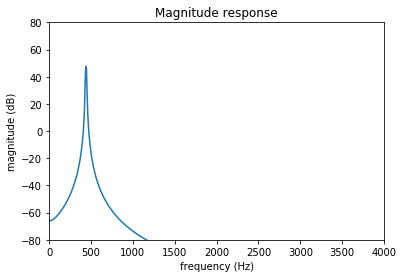

In [22]:
fi = np.arange(0,fs,fs/nfft) # freq. resolution = fs/nfft
plt.title('Magnitude response')
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')
plt.xlim(0,fs/2) # show only up to Nyquist limit (fs/2)
plt.ylim(-80,80)
plt.plot(fi,Xwdb)
plt.show()

# Class1 - 4 : STFT & time-frequency representation

import librosa

In [0]:
import librosa
import librosa.display

download audio to colab session

speechbeach1.wav
https://drive.google.com/open?id=1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR

T08-violin.wav
https://drive.google.com/open?id=142o7ZeUxJrKlGaROyk0uNU9VWnjxPax8

T39-piano.wav
https://drive.google.com/open?id=13y7WQH68D1xFIGs7ftw373iSWV-t0PNM

public_square.wav
https://drive.google.com/open?id=10PLlTJWOXSj19Wnr8NVdNwqPi0-5ppQG


In [24]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR' -O speechbeach1.wav

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=142o7ZeUxJrKlGaROyk0uNU9VWnjxPax8' -O T08-violin.wav

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13y7WQH68D1xFIGs7ftw373iSWV-t0PNM' -O T39-piano.wav

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10PLlTJWOXSj19Wnr8NVdNwqPi0-5ppQG' -O public_square.wav

print('download complete')

--2020-02-16 11:01:17--  https://docs.google.com/uc?export=download&id=1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.139, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6umkstutfbvfrorp5fg3kav6h0390sl1/1581850800000/01830637789438172170/*/1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR?e=download [following]
--2020-02-16 11:01:17--  https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6umkstutfbvfrorp5fg3kav6h0390sl1/1581850800000/01830637789438172170/*/1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR?e=download
Resolving doc-08-4c-docs.googleusercontent.com (doc-08-4c-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-08-4c-docs.googleusercontent.com (doc-08-4c-d

check audio files

In [25]:
!ls

public_square.wav  sample_data	speechbeach1.wav  T08-violin.wav  T39-piano.wav


read audio file

In [29]:
# audio_path = 'T39-piano.wav'
# audio_path = 'T08-violin.wav'
audio_path = 'speechbeach1.wav'
# audio_path = 'public_square.wav'

audio, sr = librosa.load(audio_path, sr=None)
print('sample rate of this audio file :', sr, 'Hz')
ipd.Audio(audio, rate=sr, autoplay=False) # play audio


# print(len(audio)/sr)

sample rate of this audio file : 16000 Hz


stft using librosa

In [0]:
n_fft = 1024

stft = librosa.stft(audio, n_fft=n_fft, hop_length=int(n_fft - 7*n_fft/8))
spectrogram, phase = librosa.magphase(stft)

display spectrogram

(513, 371)


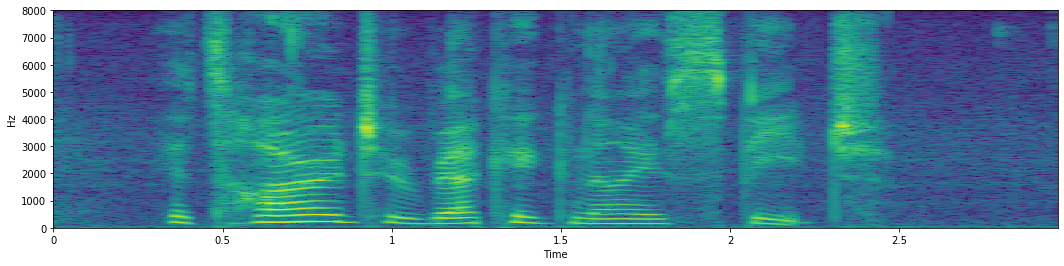

In [37]:
plt.figure(figsize=(18,4))
librosa.display.specshow(np.log(spectrogram + 0.001), cmap='viridis', x_axis='time', y_axis='linear',sr=sr,hop_length=int(n_fft - 7*n_fft/8))
print(np.shape(spectrogram))
plt.show()